In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
w = np.load('w_ecg_emg.npy')
n = np.load('n_ecg_emg.npy')

In [7]:
from scipy.stats import skew, kurtosis
from numba import jit

fs = 256
jw = fs//.25

@jit(nopython=True)
def energy(x):
    return np.sum(np.abs(x)**2)

@jit(nopython=True)
def mpp(x):
    return np.array([np.mean(x[:,i]) for i in range(len(x[0]))])

def curtose(s, j):
    m = np.zeros((2,len(j)-1))
    for i in range(len(m)):
        m[i] = np.array([kurtosis(s[i,j[ii]:j[ii+1]]) for ii in range(len(j)-1)])
    return m

def assimetria(s, j):
    m = np.zeros((2,len(j)-1))
    for i in range(len(m)):
        m[i] = np.array([skew(s[i,j[ii]:j[ii+1]]) for ii in range(len(j)-1)])
    return m
    
def variancia(s, j):
    m = np.zeros((2,len(j)-1))
    for i in range(len(m)):
        m[i] = np.array([np.var(s[i,j[ii]:j[ii+1]]) for ii in range(len(j)-1)])
    return m

def energia(s, j):
    m = np.zeros((2,len(j)-1))
    for i in range(len(m)):
        m[i] = np.array([energy(s[i,j[ii]:j[ii+1]]) for ii in range(len(j)-1)])
    return m

janela = lambda jfs,s:np.array([i*jfs for i in range(s//jfs+1)])

In [8]:
jw = 256//0.25

jc = janela(int(jw),len(w[0]))
    
c = curtose(w,jc)
a = assimetria(w,jc)
v = variancia(w,jc)
e = energia(w,jc)
    
w_features = np.array([c,a,v,e])

In [10]:
w_features.shape

(4, 2, 259)

In [11]:
jc = janela(int(jw),len(w[0]))
    
c = curtose(n,jc)
a = assimetria(n,jc)
v = variancia(n,jc)
e = energia(n,jc)
    
n_features = np.array([c,a,v,e])

In [17]:
col = ['Kurtosis','Skewness','Variance','Energy']
data_ecg = pd.DataFrame(np.hstack((w_features[:,0,:],n_features[:,0,:])).T,columns=col)
y = np.hstack((np.repeat('Yes',w_features.shape[2]),np.repeat('No',w_features.shape[2])))
data_ecg['Class'] = y
data_ecg.head()

,Kurtosis,Skewness,Variance,Energy,Class
0,7.388432,-1.643959,29746.836862,3.247852e+07,Yes
1,6.721994,-1.784648,33537.607103,3.442689e+07,Yes
2,7.281232,-1.765360,31616.902453,3.259697e+07,Yes
3,7.660464,-1.692920,27800.238596,2.898603e+07,Yes
4,6.044900,-1.365747,19564.201240,2.074905e+07,Yes


<IPython.core.display.Javascript object>


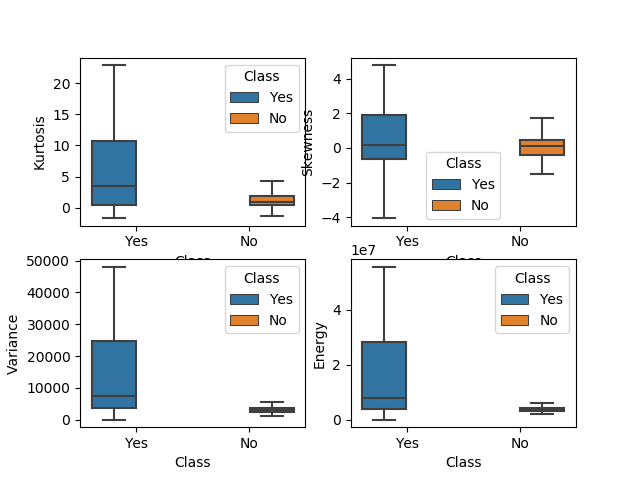

In [19]:
%matplotlib notebook
fig, ax = plt.subplots(2,2)

sns.boxplot(x="Class", y="Kurtosis", hue="Class",data=data_ecg,ax=ax[0,0],showfliers=False)
sns.boxplot(x="Class", y="Skewness", hue="Class",data=data_ecg,ax=ax[0,1],showfliers=False)
sns.boxplot(x="Class", y="Variance", hue="Class",data=data_ecg,ax=ax[1,0],showfliers=False)
sns.boxplot(x="Class", y="Energy", hue="Class",data=data_ecg,ax=ax[1,1],showfliers=False)

In [20]:
col = ['Kurtosis','Skewness','Variance','Energy']
data_emg = pd.DataFrame(np.hstack((w_features[:,1,:],n_features[:,1,:])).T,columns=col)
y = np.hstack((np.repeat('Yes',w_features.shape[2]),np.repeat('No',w_features.shape[2])))
data_emg['Class'] = y
data_emg.head()

,Kurtosis,Skewness,Variance,Energy,Class
0,-1.471059,-0.037995,40908.236777,4.206066e+07,Yes
1,-1.300849,-0.042565,51606.046872,5.301633e+07,Yes
2,-1.488737,0.003399,46864.806514,4.815751e+07,Yes
3,-1.392405,-0.050187,52997.832339,5.445643e+07,Yes
4,-1.458256,-0.017605,68840.574356,7.069748e+07,Yes


<IPython.core.display.Javascript object>


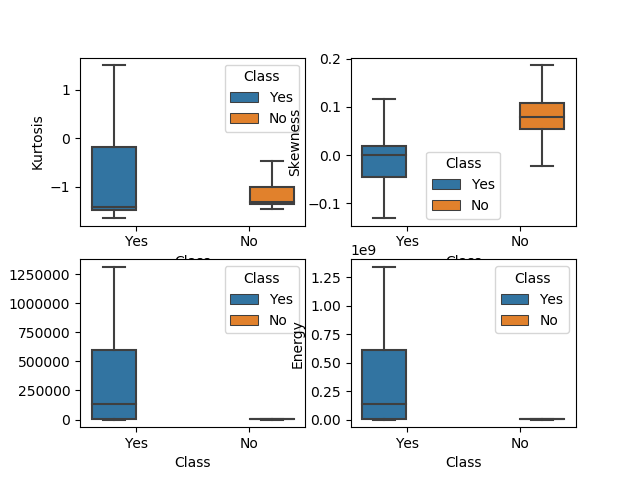

In [21]:
%matplotlib notebook
fig, ax = plt.subplots(2,2)

sns.boxplot(x="Class", y="Kurtosis", hue="Class",data=data_emg,ax=ax[0,0],showfliers=False)
sns.boxplot(x="Class", y="Skewness", hue="Class",data=data_emg,ax=ax[0,1],showfliers=False)
sns.boxplot(x="Class", y="Variance", hue="Class",data=data_emg,ax=ax[1,0],showfliers=False)
sns.boxplot(x="Class", y="Energy", hue="Class",data=data_emg,ax=ax[1,1],showfliers=False)